In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LassoLars

from scipy import stats
from scipy.stats import pearsonr, spearmanr

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import SelectKBest, f_regression, RFE

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LassoLars


# import my functions


# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
red = pd.read_csv('winequality-red.csv')
white = pd.read_csv('winequality-white.csv')

In [3]:
red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [4]:
white.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [5]:
# shape of each df

red.shape, white.shape

((1599, 12), (4898, 12))

In [6]:
# number of nulls in each df

print(f'Red nulls \n{red.isna().sum()}')
print()
print(f'White nulls \n{white.isna().sum()}')


Red nulls 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

White nulls 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
# merging the csv files

wine = pd.concat(map(pd.read_csv, ['winequality-red.csv', 'winequality-white.csv']), ignore_index=True)
wine.shape

(6497, 12)

In [8]:
# informational description

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [9]:
# statistical description 

wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [10]:
# renaming columns

wine.rename(columns = {'fixed acidity' : 'fixed_acidity', 'volatile acidity' : 'volatile_acidity', 
                       'citric acid' : 'citric_acid', 'residual sugar': 'rs', 'free sulfur dioxide': 'free_s02',
                       'total sulfur dioxide' : 'total_s02'}, inplace = True)

In [11]:
# renamed

wine.head(1)

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

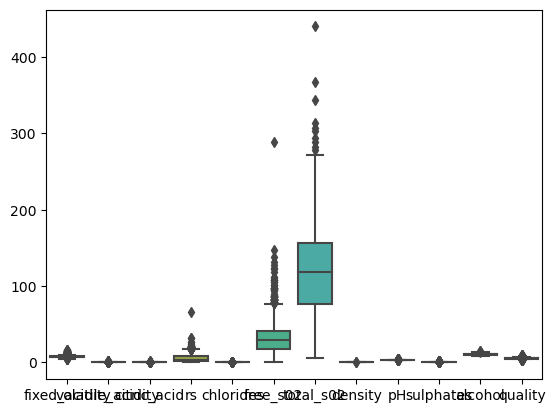

In [12]:
# looking for outliers

sns.boxplot(data = wine)

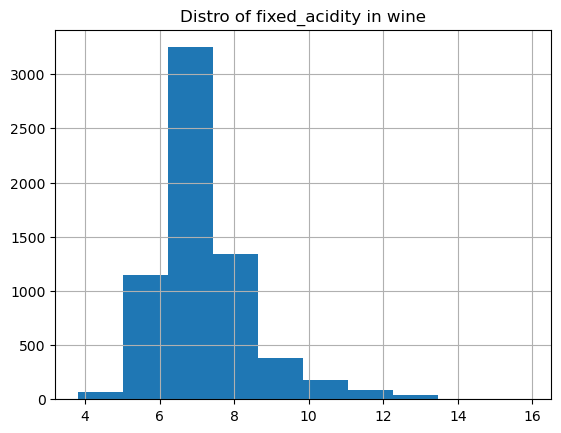

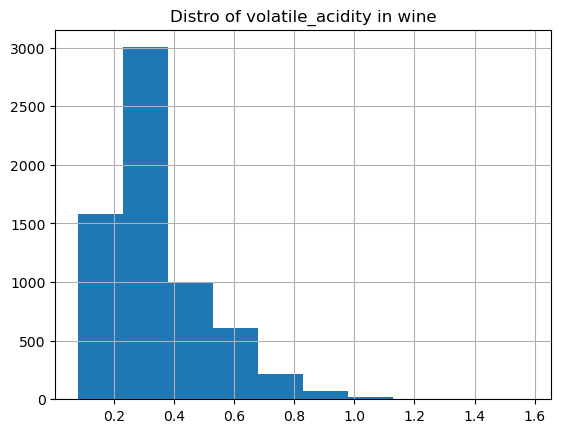

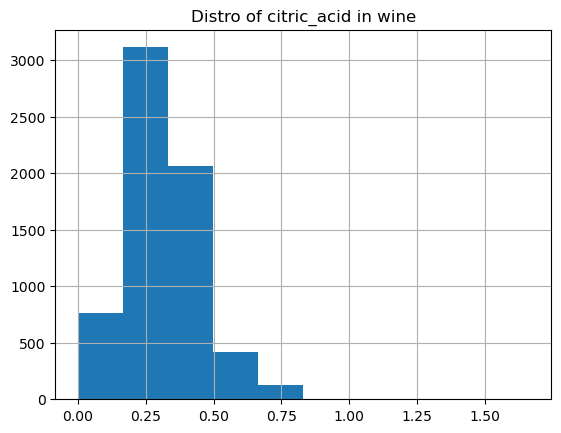

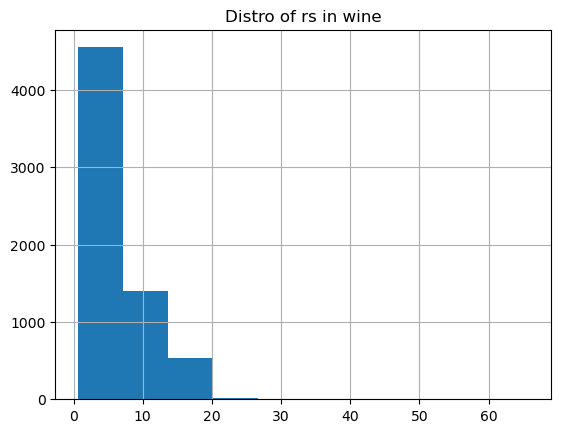

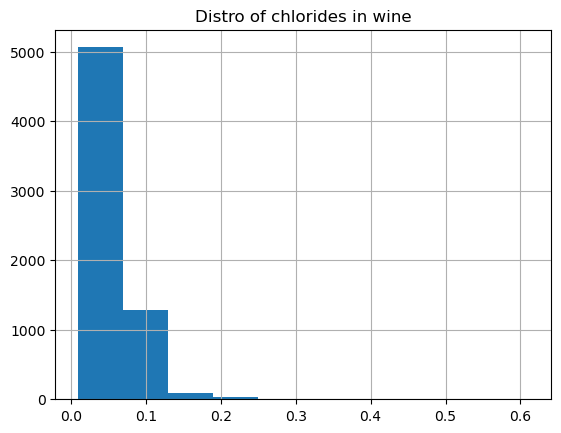

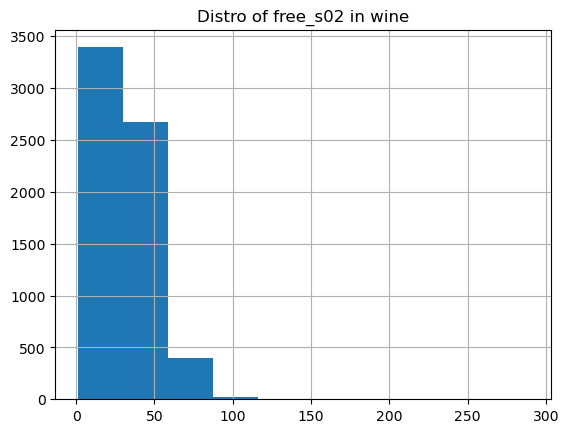

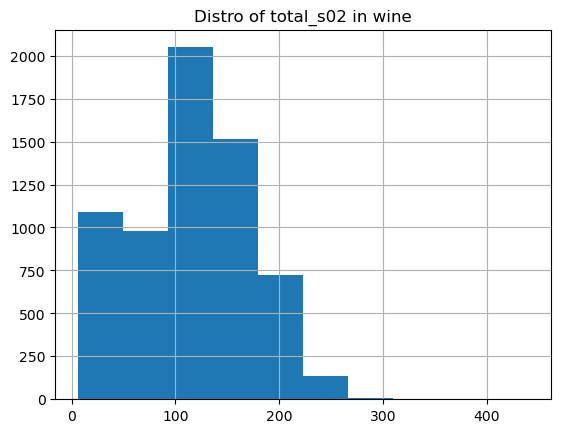

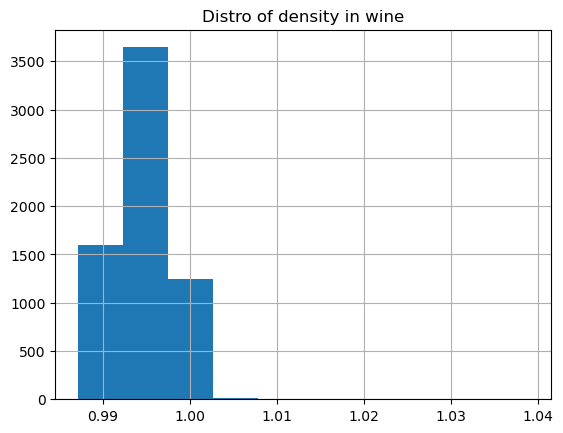

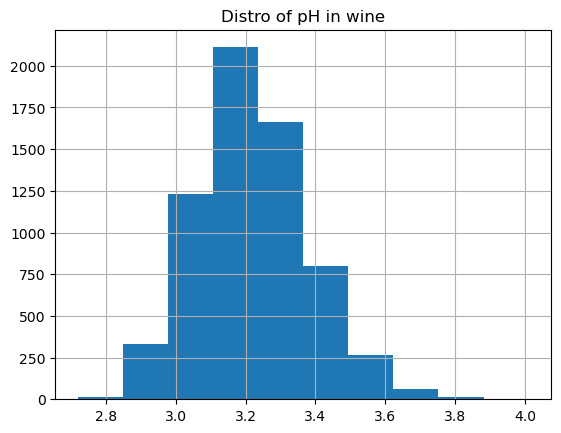

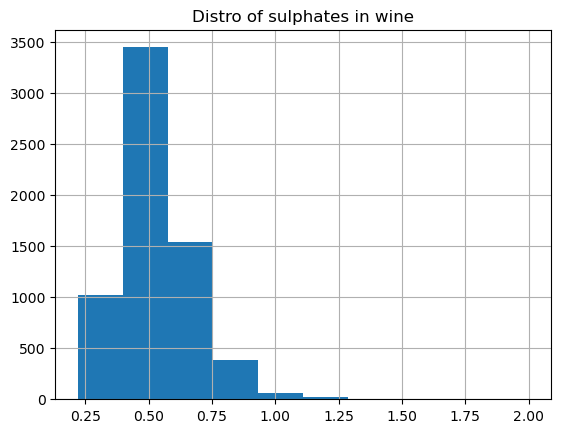

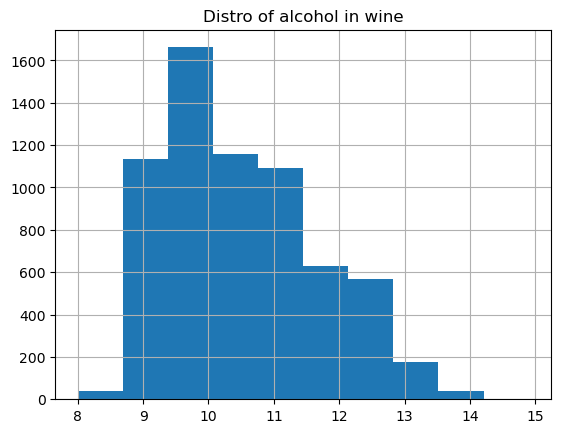

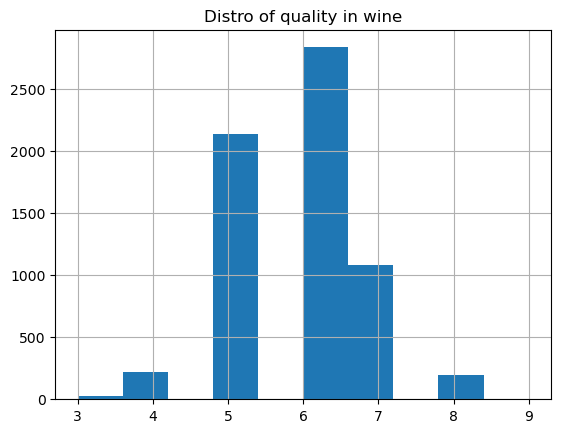

In [13]:
# plotting the numeric columns

num_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'rs', 'chlorides', 'free_s02', 'total_s02', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

for col in num_cols:
    
    plt.hist(wine[col])
    plt.title(f'Distro of {col} in wine')
    plt.grid()
    plt.show()

In [14]:
def remove_outliers(df, k=2):
    '''
    This function is to remove the top 25% and bottom 25% of the data for each column.
    This removes the top and bottom 50% for every column to ensure all outliers are gone.
    '''
    a=[]
    b=[]
    fences=[a, b]
    features= []
    col_list = []
    i=0
    for col in df:
            new_df=np.where(df[col].nunique()>8, True, False)
            if new_df==True:
                if df[col].dtype == 'float' or df[col].dtype == 'int':
                    '''
                    for each feature find the first and third quartile
                    '''
                    q1, q3 = df[col].quantile([.25, .75])
                    '''
                    calculate inter quartile range
                    '''
                    iqr = q3 - q1
                    '''
                    calculate the upper and lower fence
                    '''
                    upper_fence = q3 + (k * iqr)
                    lower_fence = q1 - (k * iqr)
                    '''
                    appending the upper and lower fences to lists
                    '''
                    a.append(upper_fence)
                    b.append(lower_fence)
                    '''
                    appending the feature names to a list
                    '''
                    features.append(col)
                    '''
                    assigning the fences and feature names to a dataframe
                    '''
                    var_fences= pd.DataFrame(fences, columns=features, index=['upper_fence', 'lower_fence'])
                    col_list.append(col)
                else:
                    print(col)
                    print('column is not a float or int')
            else:
                print(f'{col} column ignored')
    '''
    for loop used to remove the data deemed unecessary
    '''
    for col in col_list:
        df = df[(df[col]<= a[i]) & (df[col]>= b[i])]
        i+=1
        
    return df, var_fences
     

In [15]:
wine, var_fences = remove_outliers(wine)

quality column ignored


In [16]:
wine.quality.value_counts()

6    2533
5    1851
7    1004
8     179
4     172
3      13
9       5
Name: quality, dtype: int64

In [17]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,5757.0,7.034176,0.974296,3.90000,6.40000,6.90000,7.50000,10.3000
volatile_acidity,5757.0,0.319750,0.137262,0.08000,0.22000,0.28000,0.38000,0.7400
citric_acid,5757.0,0.307355,0.122002,0.00000,0.25000,0.31000,0.38000,0.6700
rs,5757.0,5.591906,4.715453,0.60000,1.80000,3.40000,8.40000,20.7000
chlorides,5757.0,0.050010,0.018637,0.00900,0.03700,0.04600,0.05700,0.1190
free_s02,5757.0,31.125413,16.437084,1.00000,18.00000,29.00000,42.00000,89.0000
total_s02,5757.0,119.781136,53.638754,6.00000,87.00000,121.00000,157.00000,303.0000
density,5757.0,0.994420,0.002858,0.98711,0.99205,0.99456,0.99666,1.0026
pH,5757.0,3.218933,0.155408,2.72000,3.11000,3.21000,3.32000,3.7200
sulphates,5757.0,0.514530,0.123028,0.22000,0.42000,0.50000,0.59000,0.9400


In [18]:
#Removing the very few super high quality wines and very few super low quality wines
wine = wine[wine.quality != 9]

wine = wine[wine.quality != 3]

In [19]:
#After removing the high and low qualities we only removed 18 lines(13 low, 5 high) from the dataset
wine.shape

(5739, 12)

# Our wine quality categories now range from 4 to 8

In [20]:
wine.quality.value_counts()

6    2533
5    1851
7    1004
8     179
4     172
Name: quality, dtype: int64